In [6]:
import csv
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import csv

In [7]:
PATH_TO_INPUT_CSV = "citations_per_year1.csv"
PUBLICATION_CUTOFF_YEAR = 2013 #only publications DURING and AFTER this year will be counted
START_YEAR = 2018
END_YEAR = 2023
YEARS_INCLUDED = END_YEAR - START_YEAR + 1 #year range count, inclusive

In [8]:
# df = pd.read_csv("citations_per_year.csv")
# print(df.head())
#find sum of each IRP's citations for every year

data = []

with open("citations_per_year.csv", "r") as f:
    reader = csv.reader(f)
    #for every article...
    for row in reader:
        row_to_add = []
        row_to_add.append(row[3]) #add publication date
        row_to_add = row_to_add+row[7:] #add irp group, citations per year
        data.append(row_to_add)

print(data)
#data is a 2D array of [publication year, irp group, 2018 citations, 2019 citations, 2020 citations, 2021 citations, 2022 citations, 2023 citations] in every row

[['publication year', 'irp', '2018', '2019', '2020', '2021', '2022', '2023'], ['2023', 'Learning Memory & Dementias', '0', '0', '0', '0', '0', '0'], ['2023', 'Learning Memory & Dementias', '0', '0', '0', '0', '4', '2'], ['2022', 'Learning Memory & Dementias', '0', '0', '0', '0', '0', '1'], ['2022', 'Learning Memory & Dementias', '0', '0', '0', '0', '3', '3'], ['2022', 'Learning Memory & Dementias', '0', '0', '0', '0', '0', '0'], ['2022', 'Learning Memory & Dementias', '0', '0', '0', '0', '0', '1'], ['2022', 'Learning Memory & Dementias', '0', '0', '0', '0', '3', '4'], ['2022', 'Learning Memory & Dementias', '0', '0', '0', '0', '6', '3'], ['2022', 'Learning Memory & Dementias', '0', '0', '0', '0', '3', '2'], ['2022', 'Learning Memory & Dementias', '0', '0', '0', '0', '10', '6'], ['2021', 'Learning Memory & Dementias', '0', '0', '0', '0', '4', '5'], ['2021', 'Learning Memory & Dementias', '0', '0', '0', '3', '6', '3'], ['2021', 'Learning Memory & Dementias', '0', '0', '0', '1', '4', '1']

In [9]:
d = {}
for year in range(PUBLICATION_CUTOFF_YEAR,END_YEAR+1):
    #format csv file into dictionaries grouped by publication year
    formatted_array = np.array([row[2:] for row in data if row[0]==str(year)]).T
    d[f"{year}_publications"] = np.array([[int(pt) for pt in formatted_array[row]] for row in range(len(formatted_array))])
    

In [112]:
print(d["2020_publications"])

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 9  6  3 ...  2  4  0]
 [15  3  6 ...  1  7  1]
 [ 7  4  2 ...  0  2  0]]


In [114]:
total_citations_per_year = [[np.sum(d[key][year]) for key in d.keys()] for year in range(0,6)]
print(total_citations_per_year)

[[3195, 2486, 2556, 2810, 2302, 718, 13, 4, 0, 0, 0], [3227, 2560, 2577, 3028, 3123, 2680, 789, 19, 0, 0, 0], [3272, 2584, 2493, 3112, 3446, 3502, 2596, 881, 19, 1, 0], [3553, 2669, 2798, 3338, 3691, 4128, 3798, 3180, 1097, 59, 1], [3374, 2305, 2483, 3017, 3671, 3788, 3775, 3805, 3406, 757, 27], [2173, 1438, 1556, 1925, 2226, 2397, 2495, 2565, 2896, 1535, 197]]


In [10]:

years = range(START_YEAR, END_YEAR+1, 1)

graph_data = {}
for year in range(START_YEAR, END_YEAR+1):
    list_to_append = []
    for pub_year in d.keys():
        print(f"{pub_year} citations in {year}: {np.sum(d[pub_year][year-START_YEAR])}")
        list_to_append.append(np.sum(d[pub_year][year-START_YEAR]))
    graph_data[f"{year}"] = list_to_append

print(graph_data)

2013_publications citations in 2018: 3195
2014_publications citations in 2018: 2486
2015_publications citations in 2018: 2556
2016_publications citations in 2018: 2810
2017_publications citations in 2018: 2302
2018_publications citations in 2018: 718
2019_publications citations in 2018: 13
2020_publications citations in 2018: 4
2021_publications citations in 2018: 0
2022_publications citations in 2018: 0
2023_publications citations in 2018: 0
2013_publications citations in 2019: 3227
2014_publications citations in 2019: 2560
2015_publications citations in 2019: 2577
2016_publications citations in 2019: 3028
2017_publications citations in 2019: 3123
2018_publications citations in 2019: 2680
2019_publications citations in 2019: 789
2020_publications citations in 2019: 19
2021_publications citations in 2019: 0
2022_publications citations in 2019: 0
2023_publications citations in 2019: 0
2013_publications citations in 2020: 3272
2014_publications citations in 2020: 2584
2015_publications c

In [143]:
d_summed = {}

for year in d.keys():
    d_summed[year] = [np.sum(row) for row in d[year]]

print(d_summed)

{'2013_publications': [3195, 3227, 3272, 3553, 3374, 2173], '2014_publications': [2486, 2560, 2584, 2669, 2305, 1438], '2015_publications': [2556, 2577, 2493, 2798, 2483, 1556], '2016_publications': [2810, 3028, 3112, 3338, 3017, 1925], '2017_publications': [2302, 3123, 3446, 3691, 3671, 2226], '2018_publications': [718, 2680, 3502, 4128, 3788, 2397], '2019_publications': [13, 789, 2596, 3798, 3775, 2495], '2020_publications': [4, 19, 881, 3180, 3805, 2565], '2021_publications': [0, 0, 19, 1097, 3406, 2896], '2022_publications': [0, 0, 1, 59, 757, 1535], '2023_publications': [0, 0, 0, 1, 27, 197]}


In [144]:
running_total = [0, 0, 0, 0, 0, 0]
for year in d_summed.keys():
    for i in range(0,6):
        running_total[i] += int(d_summed[year][i])

print(running_total)

[14084, 18003, 21906, 28312, 30408, 21403]


[[3195, 3227, 3272, 3553, 3374, 2173], [2486, 2560, 2584, 2669, 2305, 1438], [2556, 2577, 2493, 2798, 2483, 1556], [2810, 3028, 3112, 3338, 3017, 1925], [2302, 3123, 3446, 3691, 3671, 2226], [718, 2680, 3502, 4128, 3788, 2397], [13, 789, 2596, 3798, 3775, 2495], [4, 19, 881, 3180, 3805, 2565], [0, 0, 19, 1097, 3406, 2896], [0, 0, 1, 59, 757, 1535], [0, 0, 0, 1, 27, 197]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3195.0, 3227.0, 3272.0, 3553.0, 3374.0, 2173.0], [5681.0, 5787.0, 5856.0, 6222.0, 5679.0, 3611.0], [8237.0, 8364.0, 8349.0, 9020.0, 8162.0, 5167.0], [11047.0, 11392.0, 11461.0, 12358.0, 11179.0, 7092.0], [13349.0, 14515.0, 14907.0, 16049.0, 14850.0, 9318.0], [14067.0, 17195.0, 18409.0, 20177.0, 18638.0, 11715.0], [14080.0, 17984.0, 21005.0, 23975.0, 22413.0, 14210.0], [14084.0, 18003.0, 21886.0, 27155.0, 26218.0, 16775.0], [14084.0, 18003.0, 21905.0, 28252.0, 29624.0, 19671.0], [14084.0, 18003.0, 21906.0, 28311.0, 30381.0, 21206.0]]
[['3.2 K', '3.23 K', '3.27 K', '3.55 K', '3.37 K', '2

C:\Users\caoyut\AppData\Local\Temp\ipykernel_968\2703060996.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=[f"{int(y/1000)} K" for y in y_labels])


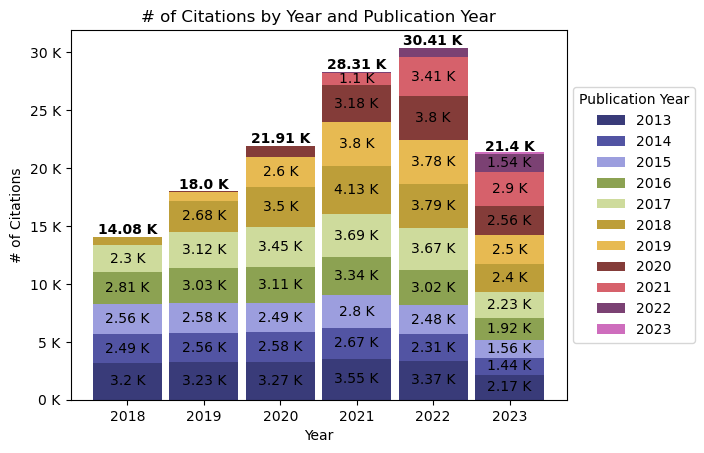

In [147]:
# <Figure size 640x480 with 1 Axes>
# def add_labels(y_intervals):
#     for i in range(len(y_intervals)):
#         y = y_intervals[i]
#         idx = 0
#         for x in range(0, 640, int(640/5)):
#             print(x, y[idx], citations[idx])
#             t = ax.text(x, 480, citations[idx])
#             idx += 1

fig, ax = plt.subplots()
bottom = np.zeros(YEARS_INCLUDED)
width = 0.9

colors = {}
cmap = matplotlib.colormaps["tab20b"]
cmap_picker = 1/len(d_summed.keys())
cmap_idx = 0

for year in d_summed.keys():
    colors[year] = cmap(cmap_idx)
    cmap_idx += cmap_picker
    
year_labels = graph_data.keys()

all_citations = []
y_intervals = []

for year, citations in d_summed.items():
    all_citations.append(citations)
    y_intervals.append(bottom.tolist())
    p = ax.bar(year_labels, citations, width, label=year.split("_")[0], bottom = bottom, color=colors[year])
    bottom += citations


print(all_citations)
print(y_intervals)

# all_citations_str = [[f"{round(count/1000, 2)} K" if count >= 1000 else f"{count}" for count in row] for row in all_citations]
all_citations_str = [[f"{round(count/1000, 2)} K" if count >= 1000 else "" for count in row] for row in all_citations]
print(all_citations_str)

ax.set_title("# of Citations by Year and Publication Year")

running_total_str = [f"{round(count/1000, 2)} K" for count in running_total]
x_intervals = range(0,6)
for year_idx in range(len(x_intervals)):
    for y in range(len(y_intervals)):
        ax.text(x_intervals[year_idx],y_intervals[y][year_idx]+(all_citations[y][year_idx]/2), all_citations_str[y][year_idx], ha="center", va="center")
    ax.text(x_intervals[year_idx],y_intervals[-1][year_idx], running_total_str[year_idx], ha="center", va="bottom",weight="bold")

y_labels = ax.get_yticks()
ax.set_yticklabels(labels=[f"{int(y/1000)} K" for y in y_labels])
ax.legend(loc="center left", bbox_to_anchor=(1,0.5), title="Publication Year")
ax.set_xlabel("Year")
ax.set_ylabel("# of Citations")
plt.show()

In [53]:
df = pd.DataFrame(d_summed)
df.to_csv("publications_per_year.csv")

In [ ]:
smsmd = [row[2:] for row in data if row[1]=='Sensory Motor Systems & Movement Disorders']
bir = [row[2:] for row in data if row[1]=='Brain Injury & Repair']
lmd = [row[2:] for row in data if row[1]=='Learning Memory & Dementias']
bdnd = [row[2:] for row in data if row[1]=='Brain Development & Neurodevelopmental Disorders']
mha = [row[2:] for row in data if row[1]=='Mental Health & Addictions']

In [ ]:
smsmd_arr = np.array(smsmd)
bir_arr = np.array(bir)
lmd_arr = np.array(lmd)
bdnd_arr = np.array(bdnd)
mha_arr = np.array(mha)

smsmd_years = np.array([[int(data) for data in smsmd[row]] for row in range(len(smsmd_arr))]).T
bir_years = np.array([[int(data) for data in bir[row]] for row in range(len(bir_arr))]).T
lmd_years = np.array([[int(data) for data in lmd[row]] for row in range(len(lmd_arr))]).T
bdnd_years = np.array([[int(data) for data in bdnd[row]] for row in range(len(bdnd_arr))]).T
mha_years = np.array([[int(data) for data in mha[row]] for row in range(len(mha_arr))]).T

In [ ]:
print(smsmd_years)

In [ ]:
idx = 0
for key in years_dictionary.keys():
    years_dictionary[key] = [
        np.sum(smsmd_years[idx]), 
        np.sum(bir_years[idx]),
        np.sum(lmd_years[idx]),
        np.sum(bdnd_years[idx]),
        np.sum(mha_years[idx])]
    idx += 1

In [ ]:
print(years_dictionary)